In [11]:
import numpy as np
import sys
sys.path.append('/home/c2032014/cygx1_paper/')
import QPO_finder_abs_stack as qfa
import importlib


#Define energy range of interest
Pmin=51
Pmax=200

file1 = '/home/c2032014/cygx1_paper/cyg_data_all/03003101/event_1pt5/ixpe03003101_det12_event_1pt5_src.fits'
file2 = '/home/c2032014/cygx1_paper/cyg_data_all/03003101/event_1pt5/ixpe03003101_det3_evt_1pt5_v01_src.fits'



gti='/home/c2032014/cygx1_paper/cyg_data_all/03003101/GTI_ixpe03003101_evt2_v01.txt'

mod_min=np.radians(-90)
mod_max=np.radians(90)
mod_bin_number=20

bin_length=1/64
seg_length=16

output_file_L1='/home/c2032014/cygx1_paper/revive/Pol_qpo_search/03003101_L1_51to200P_20bins_90mod_qpo_search.txt'
output_file_L2='/home/c2032014/cygx1_paper/revive/Pol_qpo_search/03003101_L2_51to200P_20bins_90mod_qpo_search.txt'

L1_bestfit=[0.06612687 ,0.21806132 ,0.11991786 ]
L2_bestfit=[0.65482567 ,1.59890188 ,0.01478626]



fmin_L1=0.06612687-0.2186132
fmax_L1=0.06612687+0.2186132

fmin_L2=0.65482567-1.59890188
fmax_L2=0.65482567+1.59890188

import os
import glob
def get_obs_file_pairs(obs_folder, obs_names):
    """
    Collects file1, file2, and gti paths for each observation.
    
    Args:
        obs_folder (str): Path to the folder containing observations.
        obs_names (list): List of observation directory names.
        file1_suffix (str): Filename suffix for file1.
        file2_suffix (str): Filename suffix for file2.
        gti_suffix (str): Filename suffix for GTI file.

    Returns:
        list of tuples: [(file1, file2, gti), ...]
    """
    obs_triplets = []
    for obs in obs_names:
        full_dir = os.path.join(obs_folder, obs)
        gti_path  = os.path.join(full_dir,  f"GTI_ixpe{obs}_evt2_v0*.txt")
        gti = glob.glob(gti_path)[0]
        full_dir = os.path.join(full_dir, "event_1pt5")
        file1_path = os.path.join(full_dir,  f"ixpe{obs}_det12*.fits")
        #print(file1_path)
        file1 = glob.glob(file1_path)[0]
        file2_path = os.path.join(full_dir, f"ixpe{obs}_det3*.fits")
        file2 = glob.glob(file2_path)[0]
        obs_triplets.append((file1, file2, gti))
    return obs_triplets


obs_dir='/home/c2032014/cygx1_paper/cyg_data_all'
obs_names=['03003101']
obs_triplets=get_obs_file_pairs(obs_dir, obs_names)

print(obs_triplets)


[('/home/c2032014/cygx1_paper/cyg_data_all/03003101/event_1pt5/ixpe03003101_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03003101/event_1pt5/ixpe03003101_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03003101/GTI_ixpe03003101_evt2_v01.txt')]


cs_ref_mean_real 83.15502920551606
G_real [3.8618811  4.11926615 4.24976365 4.32775325 4.33030223 3.997792
 4.03555289 4.48204303 4.20543506 4.11135127 4.19112282 4.05673913
 4.02057949 4.24645238 4.02496039 3.96624899 4.34144526 4.09591948
 4.58853666 3.98288693]
pol var (0.3351127808189916, 0.852374142105152, 0.14762585789484794, 0.18609005315637708)
constant polarised flux (0.26334149018812375, 0.9501568811721262, 0.049843118827873845, 0.06250977081624139)
F_nulls (0.12881438675819465, 0.8795193722084247, 0.12048062779157531, 0.1515785250329331)


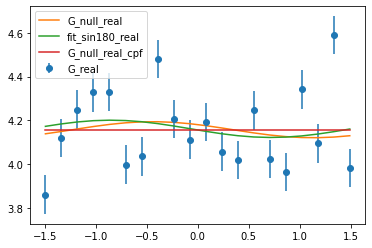

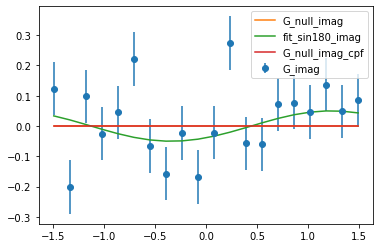

G_real [3.8618811  4.11926615 4.24976365 4.32775325 4.33030223 3.997792
 4.03555289 4.48204303 4.20543506 4.11135127 4.19112282 4.05673913
 4.02057949 4.24645238 4.02496039 3.96624899 4.34144526 4.09591948
 4.58853666 3.98288693]
G_imag [ 0.12340344 -0.20177165  0.09767816 -0.02560383  0.04472295  0.22196214
 -0.06666668 -0.15691462 -0.02318992 -0.16718001 -0.02146934  0.27398909
 -0.05632536 -0.06044451  0.07137917  0.07622536  0.04658127  0.13673717
  0.04854734  0.08479883]
G_null_real [4.13908865 4.14972946 4.16115551 4.17224836 4.18192215 4.18922994
 4.1934564  4.19418781 4.19135258 4.18522824 4.17641427 4.16577347
 4.15434741 4.14325456 4.13358077 4.12627298 4.12204652 4.12131511
 4.12415034 4.13027468]
G_null_imag [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
G_null_cpf_real 4.157751460275803
[4.15775146 4.15775146 4.15775146 4.15775146 4.15775146 4.15775146
 4.15775146 4.15775146 4.15775146 4.15775146 4.15775146 4.15775146
 4.15775146 4.15775146 4.15775146 4.157

In [10]:
importlib.reload(qfa)
result_L1= qfa.run_QPO_finder_absolute_stacked(obs_dir,obs_names,Pmin,Pmax,bin_length,seg_length,fmin_L1,fmax_L1,mod_bin_number,spur_sub=True,coherence_corrector=False,output_file=output_file_L1)


cs_ref_mean_real 23.736480772934605
G_real [1.26878763 1.09389278 1.13481497 1.22611303 1.1638084  1.17891495
 1.15033665 1.25352375 1.16479106 1.27175516 1.23171721 1.23813033
 1.1726304  1.19138697 1.16055384 1.06637528 1.20477792 1.08143388
 1.29930638 1.20638379]
pol var (0.2835246711858286, 0.8866082215384743, 0.1133917784615257, 0.14259731068486828)
constant polarised flux (0.28228064991075863, 0.9413653174207873, 0.05863468257921267, 0.07355394620986623)
F_nulls (0.30261539295785095, 0.7406472722415927, 0.25935272775840734, 0.3309963107411222)


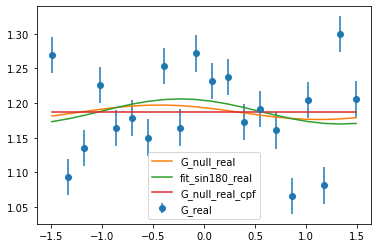

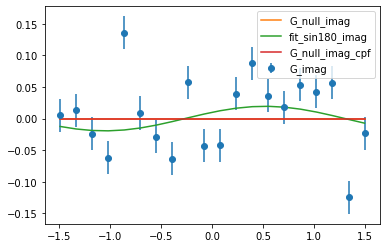

G_real [1.26878763 1.09389278 1.13481497 1.22611303 1.1638084  1.17891495
 1.15033665 1.25352375 1.16479106 1.27175516 1.23171721 1.23813033
 1.1726304  1.19138697 1.16055384 1.06637528 1.20477792 1.08143388
 1.29930638 1.20638379]
G_imag [ 0.00544164  0.01289563 -0.02360995 -0.06201775  0.13551017  0.00873149
 -0.02884017 -0.06344186  0.05745909 -0.04311781 -0.04194605  0.03907353
  0.08711054  0.0359885   0.01822706  0.05336837  0.04210115  0.05638464
 -0.12475047 -0.02317479]
G_null_real [1.18149677 1.18453417 1.18779572 1.19096216 1.19372353 1.19580952
 1.19701596 1.19722474 1.19641543 1.19466724 1.19215131 1.18911391
 1.18585236 1.18268592 1.17992455 1.17783855 1.17663212 1.17642334
 1.17723265 1.17898083]
G_null_imag [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
G_null_cpf_real 1.1868240386467304
[1.18682404 1.18682404 1.18682404 1.18682404 1.18682404 1.18682404
 1.18682404 1.18682404 1.18682404 1.18682404 1.18682404 1.18682404
 1.18682404 1.18682404 1.18682404 1.

In [12]:
result_L2= qfa.run_QPO_finder_absolute_stacked(obs_dir,obs_names,Pmin,Pmax,bin_length,seg_length,fmin_L2,fmax_L2,mod_bin_number,spur_sub=True,coherence_corrector=False,output_file=output_file_L2)